In [2]:
# apply Jupyter notebook style
from IPython.core.display import HTML

from custom.styles import style_string

HTML(style_string)

# Molecular Datasets using RDKit and Pandas

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* What are MOL and SDF files?
* How can they be used to create Mol objects in RDKit?
* How can I work with RDKit molecule objects in a pandas DataFrame?

Objectives:

* Read a MOL file.
* Create Mol objects from MOL and SDF files.
    
</div>


## Creating Mol Objects from Files

Mol object instances can be created by a variety of methods.  We've seen some examples of Mol objects being created from SMILES strings, now we'll learn some additional ways an RDKit mol object can be created.

Data for any system under investigation that is non-ideal, from real systems in experimental methods to optimized geometries in QM methods, cannot be communicated via a SMILES string.  In these situations, often more detailed specifications are needed, such as an accurate 3D geometry with explicit hydrogens.  Part of the utility of RDKit lies in its ability to create Mol objects using a variety of input formats, so that we can take molecular data from other sources or research processes and generate additional properties and descriptors.

Different methods are called for depending on the format of the molecule's specifications, depending on what you're passing passing around, between researchers, applications, or modules.  Two common and versatile formats that we'll cover today are the MOL file and related Structural Data File (SDF).

In [3]:
from rdkit import Chem

### Mol from Mol File

The MOL file is a format first created by MDL internally and published by [Dalby et al. in 1992](https://pubs.acs.org/doi/10.1021/ci00007a012).  It was created specifically for cheminformatics applications and is the most straightforward way of passing detailed structural data and metadata into RDKit.  The formatting is very precise and adhered to strictly by RDKit, so a link to the original paper has been included above.

#### Previewing the File
Before loading the file with RDKit, let's use Python to take a look at it.

In [4]:
pro_file = "data/amino_acids/pro.mol"

with open(pro_file) as file:
    print(file.read())

Pro
ref: from 2012-Stover_Dixon_ea

 17 17  0  0  0  0  0  0  0  0999 V2000
    0.6300   -1.0684    0.5217 N 
    0.9344   -1.3645    1.4436 H 
   -0.1181    0.2144    0.6213 C 
   -0.2673    0.4889    1.6696 H 
   -1.5256    0.0697    0.0130 C 
   -2.3126    0.9939   -0.0633 O 
    0.7282    1.2942   -0.1146 C 
    0.3204    1.4724   -1.1134 H 
    0.7133    2.2467    0.4171 H 
    2.1314    0.6640   -0.2043 C 
    2.7164    1.0569   -1.0403 H 
    2.6950    0.8410    0.7188 H 
    1.8131   -0.8337   -0.3476 C 
    1.5473   -1.0680   -1.3847 H 
    2.6331   -1.4941   -0.0554 H 
   -1.7998   -1.1767   -0.4239 O 
   -0.9769   -1.6897   -0.2160 H 
  1  2  1  0
  1  3  1  0
  1 13  1  0
  3  4  1  0
  3  5  1  0
  3  7  1  0
  5  6  2  0
  5 16  1  0
  7  8  1  0
  7  9  1  0
  7 10  1  0
 10 11  1  0
 10 12  1  0
 10 13  1  0
 13 14  1  0
 13 15  1  0
 16 17  1  0
M  END


#### Loading the File

To load the file, we can use the `MolFromMolFile` function in RDKit. We add the argument `strictParsing=False` in case there are any slight problems with our mol file

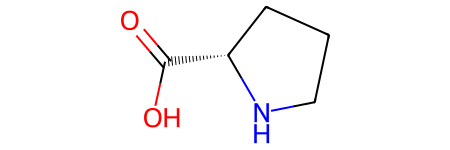

In [5]:
pro = Chem.MolFromMolFile(pro_file, strictParsing=False)
pro

<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
<p> Load and visualize histidine molecule from the mol file provided in `data/amino_acids/his.mol`. </p>
    <p><strong>Challenge</strong> - Print the stereochemistry of each molecule. Then, use a substructure search to highlight the amine group on the two amino acids </p>
</div>

## Mol from SDF

An SDF file is a collection of **MOL file** style string blocks separated by a blank line and a line composed of 4 '$' characters.  It's a very convenient way of passing sets of molecules related in some way such as by similarity or research project between users/machines.  Since each molecule's specifications is already in MOL format, creating Mol objects is very straightforward and a list of Mols is created when the file is read.

Although there are a few ways to work with SDF files in RDKit, we will highlight just one in this lesson. 
We will use the RDKit module called `PandasTools` to load all of the molecules from an SDF file into a pandas dataframe.
If you have not worked with pandas before or if you need a refresher, see notebook `03_python_data_science.ipynb`.

`PandasTools` is a module in `rdkit.Chem` that allows you to easily work with RDKit molecules and pandas dataframes.
To use it, we must first import it. 
Next, we tell rdkit that we want to see our molecules as images in the dataframe by setting `PandasTools.RenderImagesInAllDataFrames(True)`. 
This is a setting that is set once in the notebook.

The `PandasTools.LoadSDF` function loads molecules from an SDF file into a dataframe. 

In [6]:
from rdkit.Chem import PandasTools

PandasTools.RenderImagesInAllDataFrames(True)

df = PandasTools.LoadSDF("data/amino_acids/amino_acids-nat20.sdf", strictParsing=False)

,ID,ROMol
0,Ala,
1,Arg,
2,Asn,

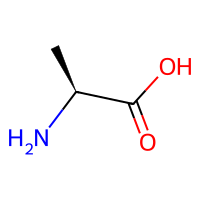
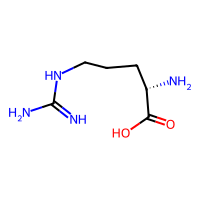
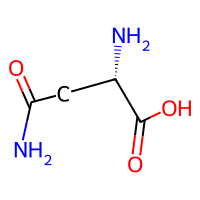

In [7]:
# View the first 3 frames
df.head(3)

## Options for loading SDF files

The SDF loaded from RDKit supports automatically adding the SMILES string to the dataframe when the data is loaded.
We can reload our SDF and get the isomeric SMILES (has stereochemistry information) at load time by adding the option
`smilesName='SMILES', isomericSmiles=True` to the function after `strictParsing=False` argument. We can also add a molecular 
fingerprint to each using the argument `includeFingerprints=True`. This will store a fingerprint on the molecule object
and make substructure searches faster.

You can see the [documentation for the LoadSDF function](http://rdkit.org/docs/source/rdkit.Chem.PandasTools.html#rdkit.Chem.PandasTools.LoadSDF) for more information.

<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>

    Add the arguments `smilesName="SMILES", isomericSmiles=True` and `includeFingerprints=True` to your `LoadSDF` function. Save your result in the `df`
    variable and view the first three rows. How is the dataframe different from the dataframe without the arguments?
</div>


<div class="attention admonition"> 
<p class="admonition-title">Another way to load SDF Files</p>
<p> You might also see a list of RDKit molecule objects created using the `SDMolSupplier` function. The syntax to create a list of Mol objects from an SDF file is:</p>


```python
mol_list = Chem.SDMolSupplier('path/to/file.sdf')
```


<p>This will create an RDKit `SDMolSupplier` object. If we would like a list of RDKit `mol` objects, we can cast the variable as a list.</p>
</div>




### Viewing multiple molecules

Multiple molecules can be placed in the same image in an array using `PandasTools.FrameToGridImage`. In the example below, we use the "ID" frame to label the molecules. We also add argument `molsPerRow=5` to specify that we want to see 5 molecules on each row.

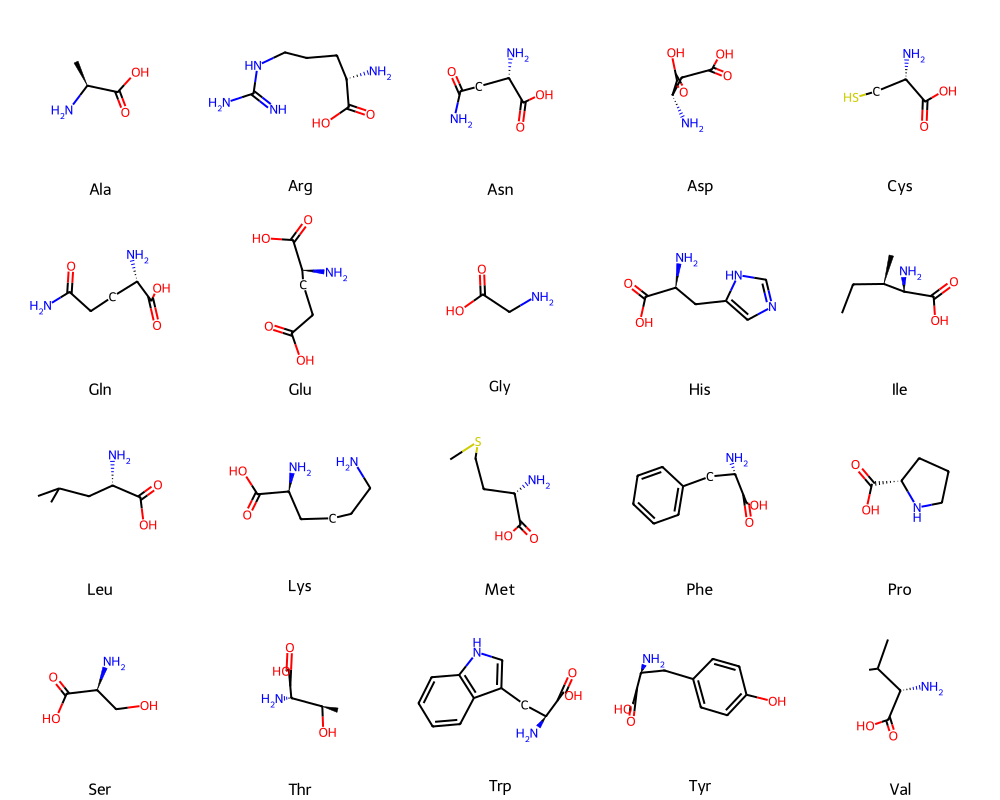

In [8]:
# Visualize the molecules
PandasTools.FrameToGridImage(df, column='ROMol', legendsCol="ID", molsPerRow=5) 

### Substructure Searches using pandas

When you have a molecule column in a pandas dataframe, you can use `>=` to do substructure searches. 
The syntax for this is

```python
df[MOL_COLUMN] >= substructure
```

This will return a list of `True` or `False` depending on if the substructure is in the molecule or not.


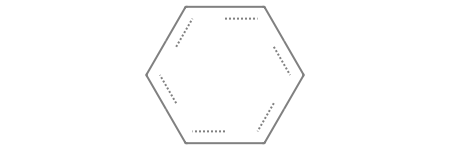

In [9]:
phenyl = Chem.MolFromSmarts("c1ccccc1") # first create the mol from the smarts string
phenyl

In [10]:
df["ROMol"] >= phenyl

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18     True
19    False
Name: ROMol, dtype: bool

You can use this as a filter to show the molecules that have this substructure.

,ID,ROMol
13,Phe,
17,Trp,
18,Tyr,

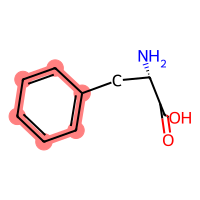
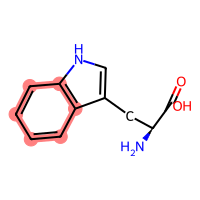
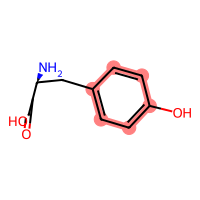

In [11]:
df[df["ROMol"] >= phenyl]

<div class="exercise admonition"> 
<p class="admonition-title">Check Your Understanding</p>
<p>Do a substructure for all amino acids that contain a methyl group (SMARTS `[CH3]`)</p>

</div>

## Building and Saving a Dataset using pandas

We can add values for some molecular descriptors to our dataframe using the `apply` method in pandas.
The `apply` method applies the function to every cell in a column. 
We can then save this as a new column in the dataframe by setting `df[new_column_name]` equal to what is returned.

In [12]:
from rdkit.Chem import Descriptors

df["MolWt"] = df["ROMol"].apply(Descriptors.MolWt) # Saves a new column called "MolWt"
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA) # Saves a new column called TPSA
df["NumHeavyAtoms"] = df["ROMol"].apply(Descriptors.HeavyAtomCount)

,ID,ROMol,MolWt,TPSA,NumHeavyAtoms
0,Ala,,89.094,63.32,6
1,Arg,,174.204,125.22,12
2,Asn,,132.119,106.41,9
3,Asp,,133.103,100.62,9
4,Cys,,121.161,63.32,7

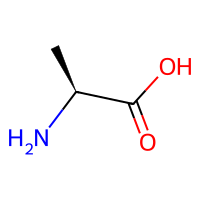
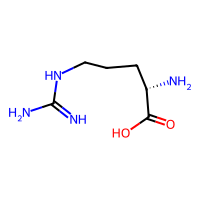
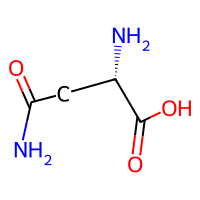
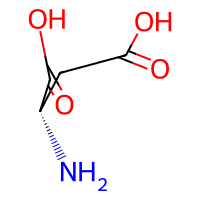
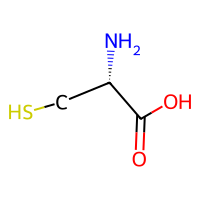

In [13]:
df.head()

We can save our dataset as an SDF with the properties we've calculated embedded by using the `PandasTools.WriteSDF` function.
To include our calculated properties, we add `properties=list(df.columns)`. This will create a file called `amino_acids-data.sdf` 
in our `data` folder.

In [15]:
PandasTools.WriteSDF(df, "data/amino_acids-data.sdf", properties=list(df.columns), allNumeric=True)

<div class="exercise admonition"> 
<p class="admonition-title">Exercise</p>
<p>You have another SDF in your data folder called 'vitamins.sdf'. Load this SDF into a dataframe, perform substructure searches, and creat a dataset of molecular descriptors.
    </p>

</div>